### 1 The Dataset: Dow Jones Industrial Average (DJIA)

In [201]:
#import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [202]:
#read the file
df = pd.read_csv('DJI.csv')

#print the head
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-19,10608.370117,10729.889648,10591.969727,10725.429688,10725.429688,192150000
1,2010-01-20,10719.690430,10719.919922,10517.299805,10603.150391,10603.150391,203270000
2,2010-01-21,10603.910156,10614.940430,10374.690430,10389.879883,10389.879883,304290000
3,2010-01-22,10389.580078,10389.580078,10157.639648,10172.980469,10172.980469,323620000
4,2010-01-25,10175.099609,10256.870117,10171.769531,10196.860352,10196.860352,215330000


### 2 About DJIA

We check if there's any null value in the dataset:

In [203]:
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

Luckly, we have a pretty clean dataset: there isn't any missing value in any column. It is not surprising since it comes from Yahoo Finance, the largest business news web site in the United States by monthly traffic.[[3]](https://en.wikipedia.org/wiki/Yahoo!_Finance)

Check the data type for each column:

In [204]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

The Date datatype need to be converted into datetime:

In [205]:
df.Date = pd.to_datetime(df.Date)

We can also look at some statistical metrics for each column to see if there is any erroneous values or outliers:

In [206]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2266.000000,2266.000000,2266.000000,2266.000000,2266.000000,2.266000e+03
mean,16690.322459,16772.632722,16604.260821,16694.564840,16694.564840,1.807341e+08
std,4461.119632,4474.398049,4445.570228,4458.569682,4458.569682,1.109795e+08
min,9686.480469,9770.870117,9614.320313,9686.480469,9686.480469,8.410000e+06
25%,12806.312500,12871.462646,12743.432129,12807.397705,12807.397705,9.940250e+07
50%,16492.035156,16561.145508,16402.804688,16491.995118,16491.995118,1.397400e+08
75%,18520.933105,18560.669922,18468.224610,18528.501953,18528.501953,2.417175e+08
max,26833.470703,26951.810547,26789.080078,26828.390625,26828.390625,9.005100e+08


Everything seem reasonable. We are good to go.

### 4 Visualizations


First, let's plot the relationship between **lowest price & highest price**, as well as the relationship between **close price & open price**:

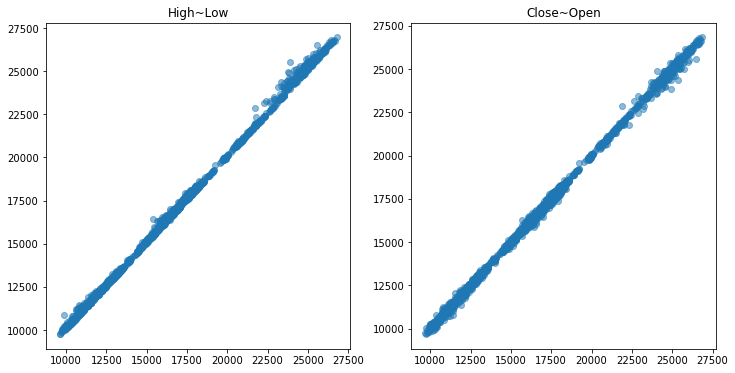

In [207]:
fig, ax = plt.subplots(1, 2, figsize=(12,6))
ax[0].scatter(df.Low, df.High,alpha=0.5)
ax[0].set_title('High~Low')


ax[1].scatter(df.Open, df.Close, alpha=0.5)
ax[1].set_title('Close~Open')

Not surprisingly, there are both positive correlations between high&low, open&close, respectively.

Then we look at how **close price** changes over **time**:

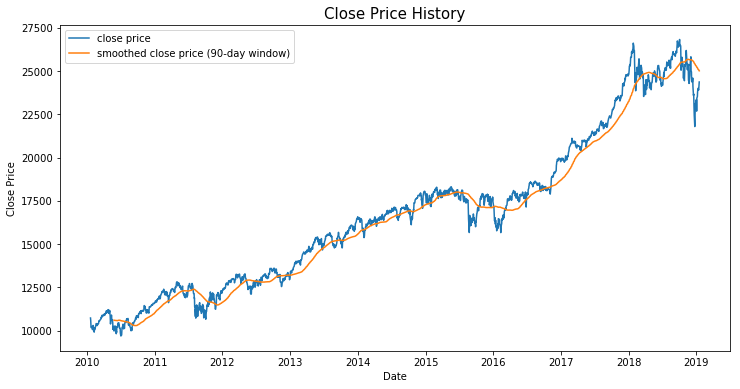

In [208]:
#setting index as date
df.index = df['Date']

#plot
plt.figure(figsize=(12,6))
plt.plot(df.Close, label='close price')
plt.plot(df.Close.rolling(window=90).mean(), label='smoothed close price (90-day window)') 

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price History', size=15)
plt.legend()

We apply a 90-day window to smoothe the curve, which can give us better understanding of the market trend. 

As can be seen, the DJIA has been increasing from around 10,000 to 25,000 from 2010 till 2019. Still, there are some declines in late 2011, early 2016 and mid 2018.

### 5 Insights

We would like to explore the **reasons** of declines in late 2011, early 2016 and mid 2018. Our assumption here is that they were due to **global issues** that cast **negative effects** over the stock market. 

By looking up in the internet, we found these news articles that could be related to the drops in DJIA:

- In Nov. 2011, we have [Stocks fall hard on Greece fears](https://money.cnn.com/2011/11/01/markets/markets_newyork/index.htm)
- In Jan. 2016, there's [Dow closes down nearly 300 points on China fears](https://money.cnn.com/2016/01/04/investing/stocks-markets-dow-china/)
- In Mar. 2018, [Dow closes more than 700 points lower as trade fears spark plunge](https://www.marketwatch.com/story/dow-poised-to-drop-by-more-than-100-points-2018-03-22)


Such interesting finding can lead to the idea of using daily news to predict stock market. Actually, there are many related studies that have been done already. People use **NLP** techniques to extract information from the news as input features to help witht the prediction of stock prices using Deep Learning models line RNN, CNN, etc.